In [423]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Analyze by describing data

In [424]:
movie_df = pd.read_csv('movie_metadata.csv')

print(movie_df.columns.values)

movie_df.head()

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [425]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [426]:
movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [427]:
movie_df.describe(include='O').T

,count,unique,top,freq
color,5024,2,Color,4815
director_name,4939,2398,Steven Spielberg,26
actor_2_name,5030,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5036,2097,Robert De Niro,49
movie_title,5043,4917,Ben-Hur,3
actor_3_name,5020,3521,John Heard,8
plot_keywords,4890,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,3
language,5029,46,English,4704


In [428]:
movie_df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

# Analyze by pivoting features

In [429]:
movie_df.groupby('color').agg({'imdb_score' : 'mean','color':'size'}).sort_values(by='imdb_score', ascending=False)

,imdb_score,color
color,,
Black and White,7.227273,209
Color,6.409533,4815


In [430]:
movie_df.groupby('facenumber_in_poster').agg({'imdb_score' : 'mean','facenumber_in_poster':'size'}).sort_values(by='imdb_score', ascending=False)
# it doesn't tell anything on the score

,imdb_score,facenumber_in_poster
facenumber_in_poster,,
43.0,7.700000,1
14.0,7.400000,1
31.0,7.100000,1
15.0,6.633333,6
0.0,6.509898,2152
1.0,6.472582,1251
8.0,6.413514,37
2.0,6.375559,716
3.0,6.374474,380


In [431]:
movie_df.groupby('content_rating').agg({'imdb_score' : 'mean','content_rating':'size'}).sort_values(by='imdb_score', ascending=False)
# it doesn't tell anything on the score

,imdb_score,content_rating
content_rating,,
TV-MA,8.250000,20
TV-Y,7.400000,1
TV-PG,7.353846,13
Approved,7.325455,55
TV-14,7.250000,30
TV-Y7,7.200000,1
Passed,7.166667,9
Unrated,6.920968,62
TV-G,6.920000,10


In [432]:
movie_df['content_rating'].value_counts().sort_values(ascending=False)

content_rating
R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: count, dtype: int64

# Wrangle Data

In [433]:
movie_df.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
language                      14
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [434]:
# We can remove the null values from the dataset where the count is less . so that we don't loose much data 

movie_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4735 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4727 non-null   object 
 1   director_name              4735 non-null   object 
 2   num_critic_for_reviews     4735 non-null   float64
 3   duration                   4735 non-null   float64
 4   director_facebook_likes    4735 non-null   float64
 5   actor_3_facebook_likes     4735 non-null   float64
 6   actor_2_name               4735 non-null   object 
 7   actor_1_facebook_likes     4735 non-null   float64
 8   gross                      4092 non-null   float64
 9   genres                     4735 non-null   object 
 10  actor_1_name               4735 non-null   object 
 11  movie_title                4735 non-null   object 
 12  num_voted_users            4735 non-null   int64  
 13  cast_total_facebook_likes  4735 non-null   int64  
 1

In [435]:
movie_df.isna().sum().sort_values(ascending=False)

gross                        643
budget                       352
aspect_ratio                 209
content_rating               169
color                          8
facenumber_in_poster           0
imdb_score                     0
actor_2_facebook_likes         0
title_year                     0
country                        0
language                       0
num_user_for_reviews           0
movie_imdb_link                0
plot_keywords                  0
actor_3_name                   0
director_name                  0
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
actor_1_name                   0
genres                         0
actor_1_facebook_likes         0
actor_2_name                   0
actor_3_facebook_likes         0
director_facebook_likes        0
duration                       0
num_critic_for_reviews         0
movie_facebook_likes           0
dtype: int64

In [436]:
movie_df.drop('color',axis=1,inplace=True)

In [437]:
#Replacing the content rating with Value R as it has highest frequency

movie_df.fillna({"content_rating": "R"}, inplace=True)

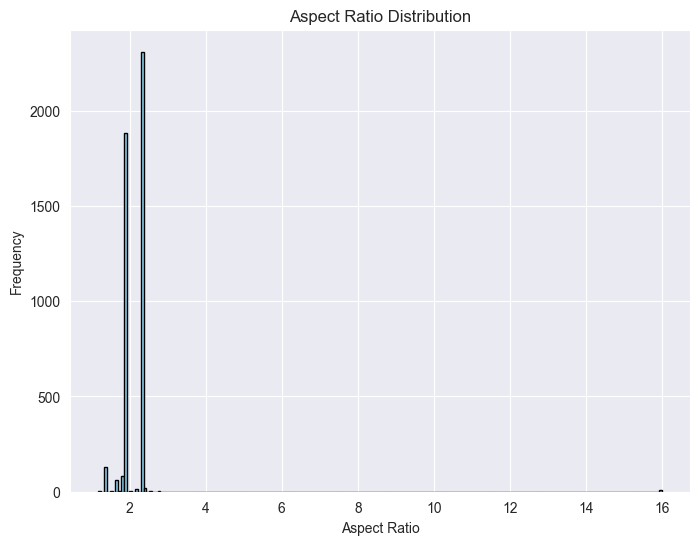

In [438]:
plt.figure(figsize=(8, 6))
plt.hist(movie_df['aspect_ratio'], bins=200, color='skyblue', edgecolor='black')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [439]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed 

movie_df.fillna({'aspect_ratio':movie_df["aspect_ratio"].median()},inplace=True)

In [440]:
#We need to replace the value in budget with the median of the value

movie_df.fillna({'budget':movie_df["budget"].median()},inplace=True)

In [441]:
# We need to replace the value in gross with the median of the value 

movie_df.fillna({'gross': movie_df['gross'].median()}, inplace=True)

In [442]:
movie_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [443]:
movie_df.drop_duplicates(inplace=True)
movie_df.shape

(4693, 27)

In [444]:
#Count of the language values 

movie_df["language"].value_counts().sort_values(ascending=False)

language
English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Korean           8
Portuguese       8
Danish           5
Persian          4
Norwegian        4
Dutch            4
Swedish          4
Hebrew           4
Arabic           3
Thai             3
Indonesian       2
Zulu             2
Aboriginal       2
Dari             2
Hungarian        1
Filipino         1
Maya             1
Kazakh           1
Telugu           1
Aramaic          1
Bosnian          1
Mongolian        1
Icelandic        1
Dzongkha         1
Czech            1
Romanian         1
Polish           1
Vietnamese       1
Greek            1
Name: count, dtype: int64

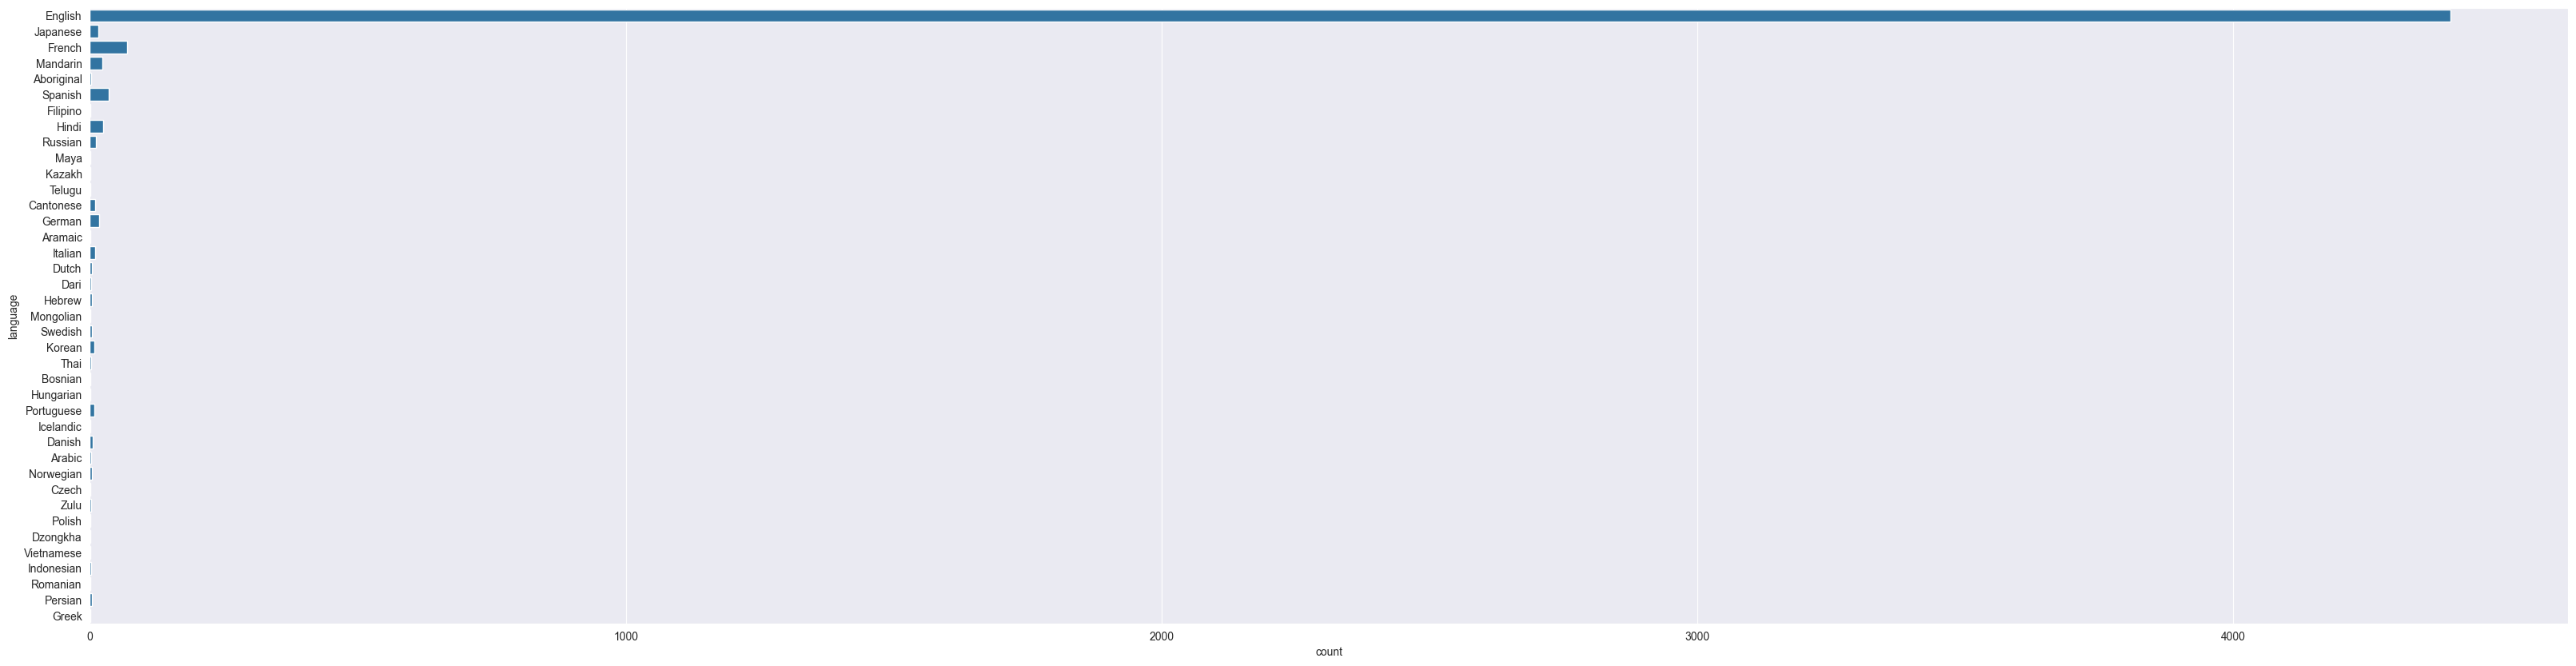

In [445]:
# Graphical presentaion 
plt.figure(figsize=(40,10))
sns.countplot(movie_df["language"])
plt.show()

In [446]:
#Most of the values for the languages is english we can drop the english column

movie_df.drop('language',axis=1,inplace=True)

In [447]:
#Creating a new column to check the net profit made by the company (Gross-Budget) 

movie_df["Profit"] = movie_df.apply(lambda row: row['gross'] - row['budget'], axis=1)

movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In [448]:
movie_df['Profit_Percentage'] = movie_df.apply(lambda row: (row['Profit']/row['gross'])*100, axis=1)

movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743


In [449]:
movie_df["country"].value_counts().sort_values(ascending=False)

country
USA               3567
UK                 420
France             149
Canada             106
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Mexico              11
Denmark             11
Russia              11
Ireland             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Czech Republic       3
Belgium              3
Switzerland          3
West Germany         3
Israel               3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Georgia              1
Soviet Union         1
Chile                1
Aruba                1
Peru                 1
Bulgaria             1
Slo

In [450]:
movie_df['country'] = movie_df['country'].apply(lambda x: x if x in ['UK', 'USA'] else 'other')

In [451]:
movie_df["country"].value_counts()

country
USA      3567
other     706
UK        420
Name: count, dtype: int64

# Data vizualisation

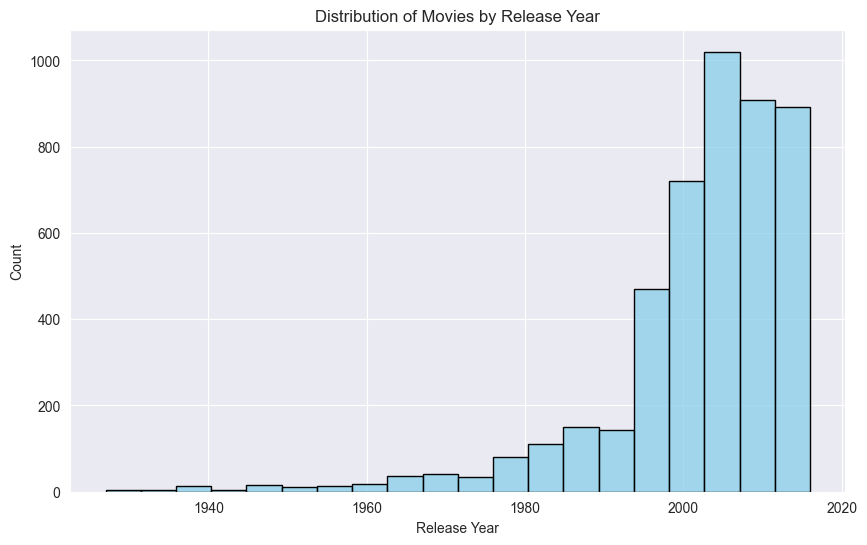

In [452]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(movie_df['title_year'], bins=20, color='skyblue', edgecolor='black')  # Create histogram using seaborn
plt.title('Distribution of Movies by Release Year')  # Set title
plt.xlabel('Release Year')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.grid(True)  # Show grid
plt.show()  # Show plot

In [453]:
movie_df['imdb_score'].corr(movie_df['Profit'])

0.029198607010275206

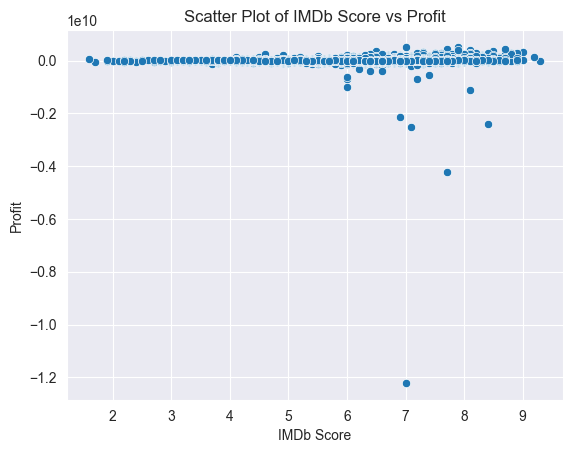

In [454]:
sns.scatterplot(x='imdb_score', y='Profit', data=movie_df)
plt.title('Scatter Plot of IMDb Score vs Profit')
plt.xlabel('IMDb Score')
plt.ylabel('Profit')
plt.show()

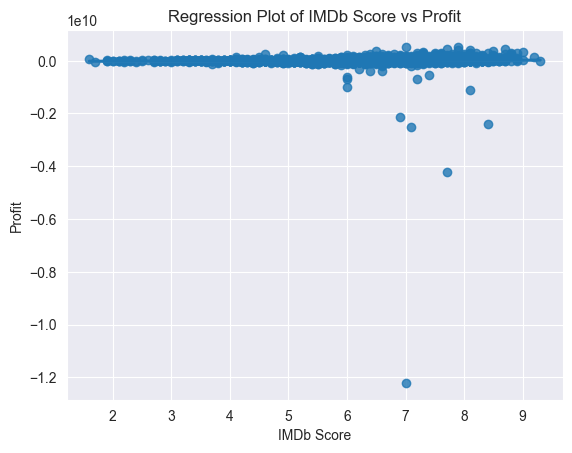

In [455]:
sns.regplot(x='imdb_score', y='Profit', data=movie_df)
plt.title('Regression Plot of IMDb Score vs Profit')
plt.xlabel('IMDb Score')
plt.ylabel('Profit')
plt.show()

In [456]:
movie_df['imdb_score'].corr(movie_df['Profit_Percentage'])

-0.0004586793182433933

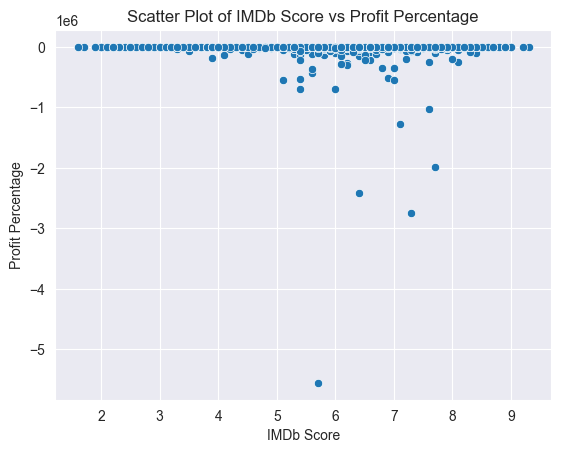

In [457]:
sns.scatterplot(x='imdb_score', y='Profit_Percentage', data=movie_df)
plt.title('Scatter Plot of IMDb Score vs Profit Percentage')
plt.xlabel('IMDb Score')
plt.ylabel('Profit Percentage')
plt.show()

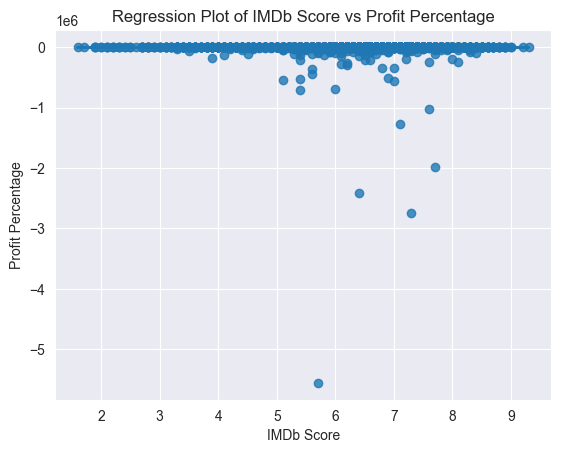

In [458]:
sns.regplot(x='imdb_score', y='Profit_Percentage', data=movie_df)
plt.title('Regression Plot of IMDb Score vs Profit Percentage')
plt.xlabel('IMDb Score')
plt.ylabel('Profit Percentage')
plt.show()


In [459]:
movie_df.groupby('country')['imdb_score'].corr(movie_df['Profit_Percentage'])

country
UK       0.068343
USA      0.042341
other   -0.003612
Name: imdb_score, dtype: float64

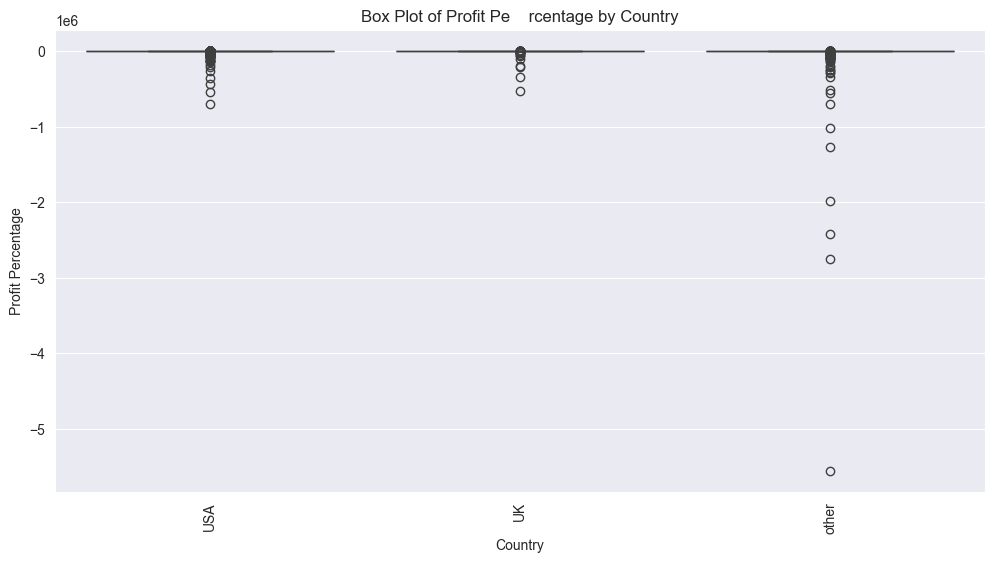

In [460]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='Profit_Percentage', data=movie_df)
plt.title('Box Plot of Profit Pe    rcentage by Country')
plt.xlabel('Country')
plt.ylabel('Profit Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

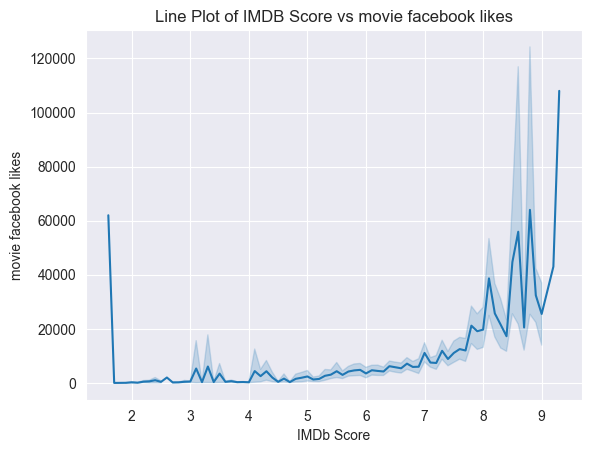

In [461]:
sns.lineplot(x='imdb_score', y='movie_facebook_likes', data=movie_df)
plt.title('Line Plot of IMDB Score vs movie facebook likes')
plt.xlabel('IMDb Score')
plt.ylabel('movie facebook likes')
plt.show()

We can do more plots to get more insights

# Data preparation

In [462]:
#Removing columns

movie_df.drop('director_name', axis=1, inplace=True)
movie_df.drop('actor_1_name',axis=1,inplace=True)
movie_df.drop('actor_2_name',axis=1,inplace=True)
movie_df.drop('actor_3_name',axis=1,inplace=True)
movie_df.drop('movie_title',axis=1,inplace=True)
movie_df.drop('plot_keywords',axis=1,inplace=True)


In [463]:
movie_df['genres'].value_counts()

genres
Drama                                                           209
Comedy                                                          186
Comedy|Drama|Romance                                            182
Comedy|Drama                                                    180
Comedy|Romance                                                  149
                                                               ... 
Adventure|Comedy|Family|Sci-Fi                                    1
Action|Adventure|Crime|Drama|Family|Fantasy|Romance|Thriller      1
Adventure|Comedy|History|Romance                                  1
Adventure|Family|Fantasy|Sci-Fi                                   1
Comedy|Crime|Horror                                               1
Name: count, Length: 875, dtype: int64

In [464]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column

movie_df.drop('genres',axis=1,inplace =True)

Dropping linear dependant volume

In [465]:
movie_df.drop('Profit',axis=1,inplace=True)
movie_df.drop('Profit_Percentage',axis=1,inplace=True)

In [466]:
movie_df.drop('movie_imdb_link',axis=1,inplace=True)

Convert object attributes to numeric attributes

In [467]:
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4693 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4693 non-null   float64
 1   duration                   4693 non-null   float64
 2   director_facebook_likes    4693 non-null   float64
 3   actor_3_facebook_likes     4693 non-null   float64
 4   actor_1_facebook_likes     4693 non-null   float64
 5   gross                      4693 non-null   float64
 6   num_voted_users            4693 non-null   int64  
 7   cast_total_facebook_likes  4693 non-null   int64  
 8   facenumber_in_poster       4693 non-null   float64
 9   num_user_for_reviews       4693 non-null   float64
 10  country                    4693 non-null   object 
 11  content_rating             4693 non-null   object 
 12  budget                     4693 non-null   float64
 13  title_year                 4693 non-null   float64
 1

In [468]:
movie_df.groupby('content_rating')['content_rating'].size().sort_values(ascending=False)

content_rating
R            2229
PG-13        1418
PG            678
G             109
Not Rated     100
Unrated        57
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [469]:
rating_map = {'R': 0, 'PG-13': 1}

movie_df['content_rating'] = movie_df['content_rating'].apply(lambda x: rating_map[x] if x in rating_map else 2)

In [470]:
country_map = {'USA': 0, 'UK': 1}

movie_df['country'] = movie_df['country'].apply(lambda x: country_map[x] if x in country_map else 2)

<Axes: >

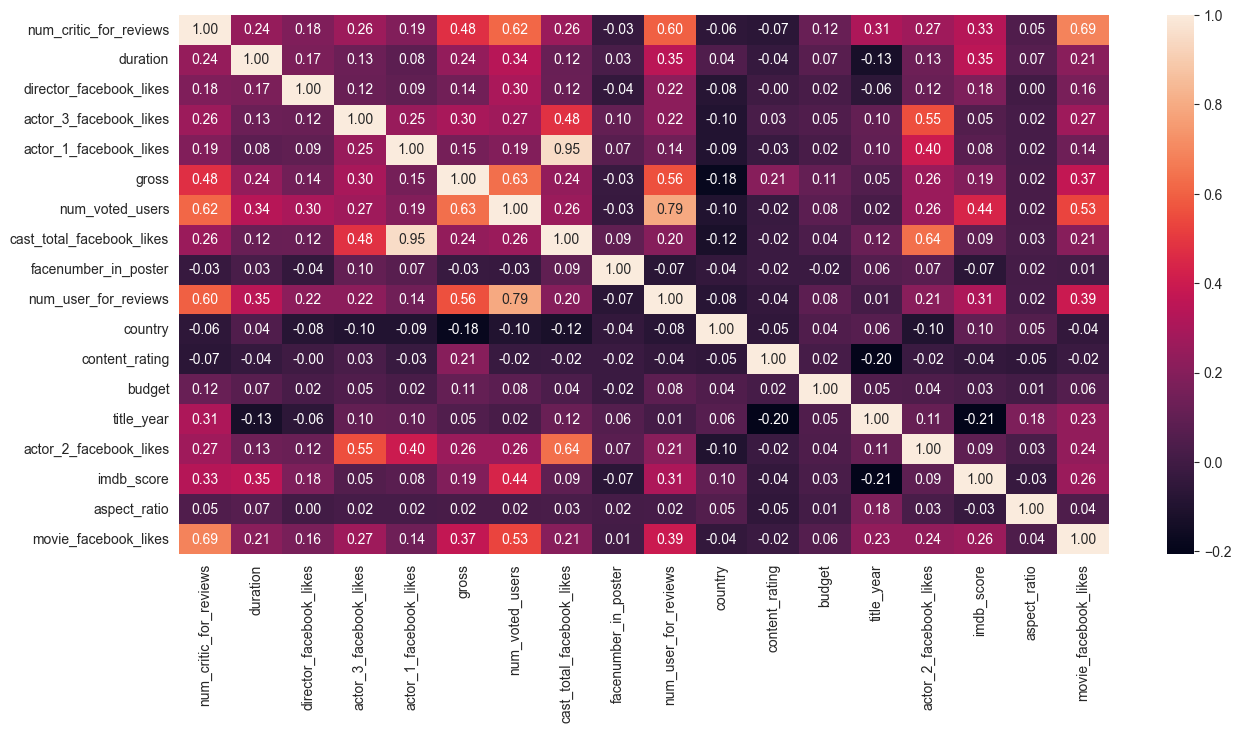

In [471]:
plt.figure(figsize=(15,7))
sns.heatmap(movie_df.corr(),annot=True, fmt='.2f')

** We can see that the cast_total_facebook_likes and actor_1_facebook_like are highly correlated to each other. Both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.

There are high correlations among num_voted_users, num_user_for_reviews and num_critic_for_reviews. We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

In [472]:
#Adding the facebook likes of actor 2 and actor 3 together 
movie_df['Other_actor_facebbok_likes']=movie_df["actor_2_facebook_likes"] + movie_df['actor_3_facebook_likes']
#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together 

movie_df.drop('actor_2_facebook_likes',axis=1,inplace=True)
movie_df.drop('actor_3_facebook_likes',axis=1,inplace=True)
movie_df.drop('cast_total_facebook_likes',axis=1,inplace=True)

In [473]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.
movie_df['critic_review_ratio']=movie_df['num_critic_for_reviews']/movie_df['num_user_for_reviews']
#Dropping the num_critic_for_review

movie_df.drop('num_critic_for_reviews',axis=1,inplace=True)
movie_df.drop('num_user_for_reviews',axis=1,inplace=True)

<Axes: >

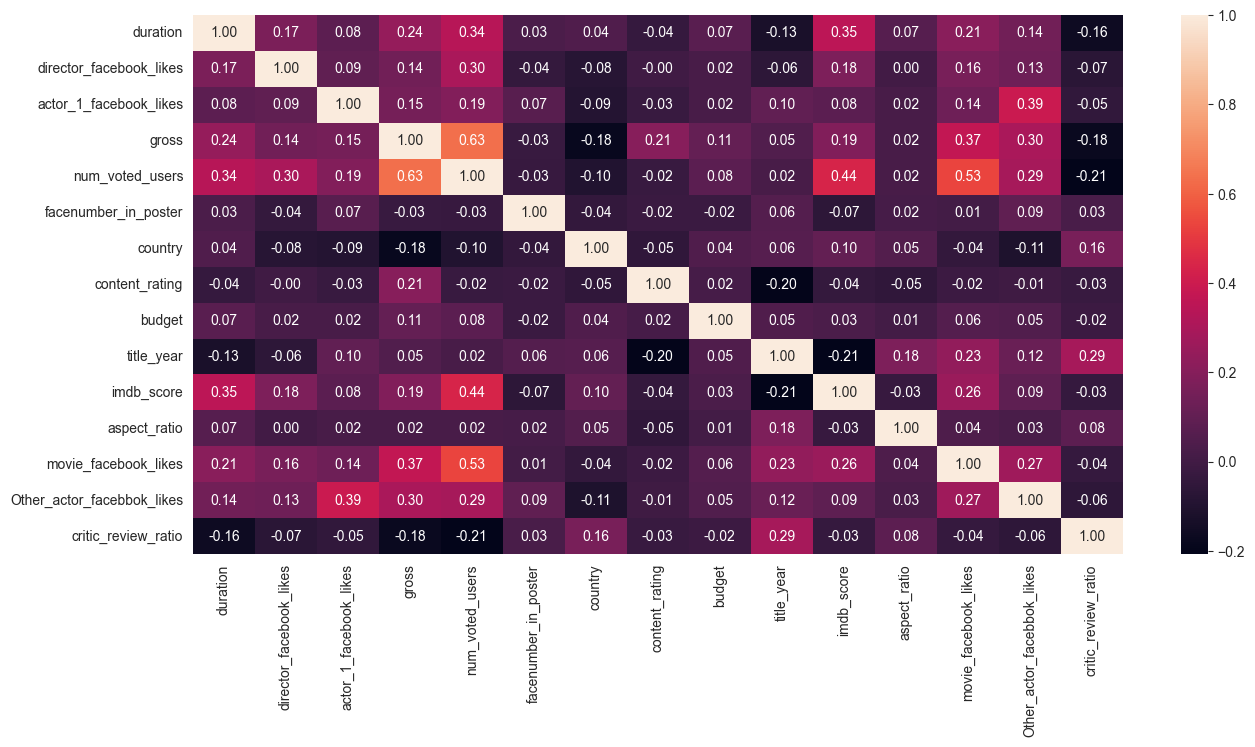

In [474]:
plt.figure(figsize=(15,7))
sns.heatmap(movie_df.corr(),annot=True, fmt='.2f')

In [475]:
def imdb_ordinal(score):
    if score<=4:
        return 0
    elif score>4 and score<=6:
        return 1
    elif score>6 and score<=8:
        return 2
    else:
        return 3
    
movie_df = movie_df.assign(imdb_score=movie_df['imdb_score'].apply(imdb_ordinal))

movie_df

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actor_facebbok_likes,critic_review_ratio
0,178.0,0.0,1000.0,760505847.0,886204,0.0,0,1,237000000.0,2009.0,2,1.78,33000,1791.0,0.236739
1,169.0,563.0,40000.0,309404152.0,471220,0.0,0,1,300000000.0,2007.0,2,2.35,0,6000.0,0.243942
2,148.0,0.0,11000.0,200074175.0,275868,1.0,1,1,245000000.0,2015.0,2,2.35,85000,554.0,0.605634
3,164.0,22000.0,27000.0,448130642.0,1144337,0.0,0,1,250000000.0,2012.0,3,2.35,164000,46000.0,0.301000
5,132.0,475.0,640.0,73058679.0,212204,1.0,0,1,263700000.0,2012.0,2,2.35,24000,1162.0,0.626016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,80.0,0.0,0.0,70071.0,589,0.0,2,2,7000.0,2005.0,2,2.35,74,0.0,1.000000
5035,81.0,0.0,121.0,2040920.0,52055,0.0,0,0,7000.0,1992.0,2,1.37,0,26.0,0.430769
5037,95.0,0.0,296.0,4584.0,1338,1.0,0,2,9000.0,2011.0,2,2.35,413,338.0,1.000000
5038,87.0,2.0,637.0,26027495.0,629,2.0,2,0,20000000.0,2013.0,2,2.35,84,788.0,0.166667


# Classification Model Selection

In [476]:
X=movie_df.drop("imdb_score",axis=1)
Y=movie_df['imdb_score']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3285, 14), (3285,), (1408, 14), (1408,))

In [477]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [478]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

71.08

In [479]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

74.34

In [480]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.52

In [481]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

31.42

In [482]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

65.42

In [483]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\hserraj\Desktop\Personal\Github\Movie Score prediction\.venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hserraj\Desktop\Personal\Github\Movie Score prediction\.venv\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


67.85

In [484]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

66.21